<a href="https://colab.research.google.com/github/sckgn/FinalYearProject_ML/blob/main/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AdaBoost is an ensemble algorithm that combines multiple weak learners (algorithms that are generally simple) sequentially. The focus is on improving previously made errors.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset_2018.csv to dataset_2018.csv


In [2]:
import os 
import pandas as pd
import sklearn
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Read in ASDTest dataset
asd_2018_df = pd.read_csv("dataset_2018.csv")

asd_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [3]:
asd_2018_df.rename(columns={'Class/ASD Traits ':'ASD_Traits'},inplace=True)

In [4]:
mixed_df = asd_2018_df.drop(['Case_No','Qchat-10-Score','Who completed the test'],axis=1)
mixed_df.columns
mixed_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,Yes


In [5]:
features=list(mixed_df)

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

encoder = OneHotEncoder()
scaler = MinMaxScaler()

age = ['Age_Mons']
char_vals = ['ASD_Traits','Sex','Jaundice','Family_mem_with_ASD','Ethnicity']
target = ['ASD_Traits']

In [7]:
def preprocess(age, char_vals,dataframe):
  dataframe[age] = scaler.fit_transform(dataframe[age].values.reshape(-1,1)) 

  for c in char_vals:
      dataframe[c] = encoder.fit_transform(dataframe[c].values.reshape(-1,1)).toarray()
  print(dataframe.dtypes)
  print(dataframe.head())

In [8]:
def cross_validation_results(model, predictors, target, metrics,cv):
  results = cross_validate(model, predictors, target, scoring = metrics, return_train_score=False, cv=10)

  print("Mean Test R2: ", results['test_r2'].mean())
  rmse = np.sqrt(-results['test_neg_mean_squared_error']).mean()
  print("Mean Test MSE: ", -results['test_neg_mean_squared_error'].mean())
  print("Test std: ",np.sqrt(-results['test_neg_mean_squared_error']).std() )
  print("RMSE Test: ", rmse)
  print("Accuracy: ", results['test_accuracy'].mean())

In [101]:
from sklearn.metrics import r2_score, mean_squared_error

def evaluate_on_test(model, predictors, target):
  predictions = model.predict(predictors)
  mse = mean_squared_error(target, predictions)
  print("R2 score: ", r2_score(target, predictions))
  print("Accuracy: ", accuracy_score(target, predictions))
  print("MSE: ", mse)
  print("RMSE: ", np.sqrt(mse))
  ConfusionMatrixDisplay.from_estimator(model, predictors, target)

In [9]:
metrics =['r2','neg_mean_squared_error','accuracy']

In [10]:
preprocess(age,char_vals,mixed_df)

A1                       int64
A2                       int64
A3                       int64
A4                       int64
A5                       int64
A6                       int64
A7                       int64
A8                       int64
A9                       int64
A10                      int64
Age_Mons               float64
Sex                    float64
Ethnicity              float64
Jaundice               float64
Family_mem_with_ASD    float64
ASD_Traits             float64
dtype: object
   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  Ethnicity  \
0   0   0   0   0   0   0   1   1   0    1  0.666667  1.0        0.0   
1   1   1   0   0   0   1   1   0   0    0  1.000000  0.0        0.0   
2   1   0   0   0   0   0   1   1   0    1  1.000000  0.0        0.0   
3   1   1   1   1   1   1   1   1   1    1  0.500000  0.0        1.0   
4   1   1   0   1   1   1   1   1   1    1  0.333333  1.0        0.0   

   Jaundice  Family_mem_with_ASD  ASD_Traits  
0       0.

In [97]:
from sklearn.model_selection import train_test_split

X_mixed = mixed_df.drop("ASD_Traits", axis=1)
y_mixed = mixed_df["ASD_Traits"]
sex = mixed_df["Sex"]


X_mixed_train, X_mixed_test , y_mixed_train, y_mixed_test = train_test_split(X_mixed, y_mixed, test_size=0.3, random_state=42, stratify=sex)

In [98]:
from numpy import mean, std
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, cross_validate
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada_mixed = ada.fit(X_mixed_train, y_mixed_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(ada_mixed, X_mixed_train, y_mixed_train, scoring='accuracy',cv=cv, n_jobs=-1)

print('AdaBoostClassifier Mixed Dataset accuracy:  %.3f (%.3f)' % (mean(scores),std(scores)))

AdaBoostClassifier Mixed Dataset accuracy:  1.000 (0.000)


In [123]:
importance_mixed = ada_mixed.feature_importances_

mixed_importances = sorted(zip(importance_mixed, features), reverse=True)
mixed_importances

[(0.12, 'A4'),
 (0.1, 'A8'),
 (0.1, 'A7'),
 (0.1, 'A6'),
 (0.1, 'A5'),
 (0.1, 'A2'),
 (0.1, 'A10'),
 (0.1, 'A1'),
 (0.08, 'A9'),
 (0.08, 'A3'),
 (0.02, 'Jaundice'),
 (0.0, 'Sex'),
 (0.0, 'Family_mem_with_ASD'),
 (0.0, 'Ethnicity'),
 (0.0, 'Age_Mons')]

In [100]:
cross_validation_results(ada_mixed, X_mixed_train, y_mixed_train, metrics, cv=10)

Mean Test R2:  1.0
Mean Test MSE:  -0.0
Test std:  0.0
RMSE Test:  0.0
Accuracy:  1.0


R2 score:  1.0
Accuracy:  1.0
MSE:  0.0
RMSE:  0.0


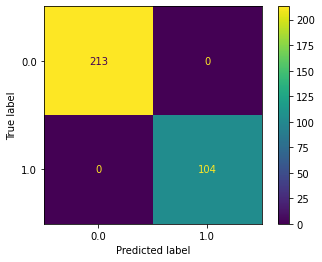

In [102]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, PrecisionRecallDisplay

evaluate_on_test(ada_mixed, X_mixed_test, y_mixed_test)

**Train, test, validation split**

In [ ]:
new_mixed_df = asd_2018_df.drop(['Case_No','Qchat-10-Score','Who completed the test'],axis=1)
new_mixed_df.columns
new_mixed_df.head()

In [ ]:
preprocess(age, char_vals, new_mixed_df)

In [18]:
X_new = new_mixed_df.drop(['ASD_Traits'], axis=1)
y_new = new_mixed_df['ASD_Traits']

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.30, random_state=42, stratify=y_new)

In [19]:
X_new_validate, X_new_test, y_new_validate, y_new_test = train_test_split(X_new_test, y_new_test, test_size=0.50, random_state=42, stratify=y_new_test)

In [20]:
new_ada = AdaBoostClassifier()

new_ada.fit(X_new_train, y_new_train)

AdaBoostClassifier()

In [22]:
new_val_pred = new_ada.predict(X_new_validate)
print('Accuracy:', accuracy_score(y_new_validate, new_val_pred))

Accuracy: 1.0


In [58]:
new_ada.score(X_new_validate, y_new_validate)

1.0

In [60]:
cross_validation_results(new_ada, X_new_train, y_new_train, metrics, cv=10)

Mean Test R2:  1.0
Mean Test MSE:  -0.0
Test std:  0.0
RMSE Test:  0.0
Accuracy:  1.0


R2 score:  1.0
Accuracy:  1.0
MSE:  0.0
RMSE:  0.0


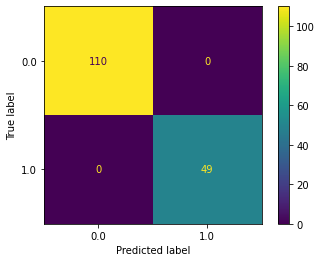

In [64]:
evaluate_on_test(new_ada, X_new_test, y_new_test)

**1:1 male to female ratio**

In [24]:
f_only = asd_2018_df[asd_2018_df['Sex']=='f']
f_only.info()
f_only['ASD_Traits'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 1049
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 319 non-null    int64 
 1   A1                      319 non-null    int64 
 2   A2                      319 non-null    int64 
 3   A3                      319 non-null    int64 
 4   A4                      319 non-null    int64 
 5   A5                      319 non-null    int64 
 6   A6                      319 non-null    int64 
 7   A7                      319 non-null    int64 
 8   A8                      319 non-null    int64 
 9   A9                      319 non-null    int64 
 10  A10                     319 non-null    int64 
 11  Age_Mons                319 non-null    int64 
 12  Qchat-10-Score          319 non-null    int64 
 13  Sex                     319 non-null    object
 14  Ethnicity               319 non-null    object
 15  Jaund

Yes    194
No     125
Name: ASD_Traits, dtype: int64

In [25]:
y_male = asd_2018_df[(asd_2018_df['Sex']=='m') & (asd_2018_df['ASD_Traits']=='Yes')].head(194)
y_male.info()
y_male['ASD_Traits'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 1 to 405
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 194 non-null    int64 
 1   A1                      194 non-null    int64 
 2   A2                      194 non-null    int64 
 3   A3                      194 non-null    int64 
 4   A4                      194 non-null    int64 
 5   A5                      194 non-null    int64 
 6   A6                      194 non-null    int64 
 7   A7                      194 non-null    int64 
 8   A8                      194 non-null    int64 
 9   A9                      194 non-null    int64 
 10  A10                     194 non-null    int64 
 11  Age_Mons                194 non-null    int64 
 12  Qchat-10-Score          194 non-null    int64 
 13  Sex                     194 non-null    object
 14  Ethnicity               194 non-null    object
 15  Jaundi

Yes    194
Name: ASD_Traits, dtype: int64

In [26]:
n_male = asd_2018_df[(asd_2018_df['Sex']=='m') & (asd_2018_df['ASD_Traits']=='No')].head(125)
n_male.info()
n_male['ASD_Traits'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 8 to 704
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 125 non-null    int64 
 1   A1                      125 non-null    int64 
 2   A2                      125 non-null    int64 
 3   A3                      125 non-null    int64 
 4   A4                      125 non-null    int64 
 5   A5                      125 non-null    int64 
 6   A6                      125 non-null    int64 
 7   A7                      125 non-null    int64 
 8   A8                      125 non-null    int64 
 9   A9                      125 non-null    int64 
 10  A10                     125 non-null    int64 
 11  Age_Mons                125 non-null    int64 
 12  Qchat-10-Score          125 non-null    int64 
 13  Sex                     125 non-null    object
 14  Ethnicity               125 non-null    object
 15  Jaundi

No    125
Name: ASD_Traits, dtype: int64

In [27]:
equal_male = pd.concat([y_male,n_male], axis=0)
equal_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 1 to 704
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 319 non-null    int64 
 1   A1                      319 non-null    int64 
 2   A2                      319 non-null    int64 
 3   A3                      319 non-null    int64 
 4   A4                      319 non-null    int64 
 5   A5                      319 non-null    int64 
 6   A6                      319 non-null    int64 
 7   A7                      319 non-null    int64 
 8   A8                      319 non-null    int64 
 9   A9                      319 non-null    int64 
 10  A10                     319 non-null    int64 
 11  Age_Mons                319 non-null    int64 
 12  Qchat-10-Score          319 non-null    int64 
 13  Sex                     319 non-null    object
 14  Ethnicity               319 non-null    object
 15  Jaundi

In [28]:
equal_ratio = pd.concat([f_only, equal_male], axis=0)
equal_ratio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 704
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 638 non-null    int64 
 1   A1                      638 non-null    int64 
 2   A2                      638 non-null    int64 
 3   A3                      638 non-null    int64 
 4   A4                      638 non-null    int64 
 5   A5                      638 non-null    int64 
 6   A6                      638 non-null    int64 
 7   A7                      638 non-null    int64 
 8   A8                      638 non-null    int64 
 9   A9                      638 non-null    int64 
 10  A10                     638 non-null    int64 
 11  Age_Mons                638 non-null    int64 
 12  Qchat-10-Score          638 non-null    int64 
 13  Sex                     638 non-null    object
 14  Ethnicity               638 non-null    object
 15  Jaundi

In [29]:
equal_ratio = equal_ratio.drop(['Case_No','Qchat-10-Score','Who completed the test'], axis=1)

In [30]:
preprocess(age, char_vals,equal_ratio)

A1                       int64
A2                       int64
A3                       int64
A4                       int64
A5                       int64
A6                       int64
A7                       int64
A8                       int64
A9                       int64
A10                      int64
Age_Mons               float64
Sex                    float64
Ethnicity              float64
Jaundice               float64
Family_mem_with_ASD    float64
ASD_Traits             float64
dtype: object
    A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Sex  Ethnicity  \
0    0   0   0   0   0   0   1   1   0    1  0.666667  1.0        0.0   
4    1   1   0   1   1   1   1   1   1    1  0.333333  1.0        0.0   
12   0   0   0   0   0   0   0   0   0    0  0.541667  1.0        0.0   
13   1   1   1   1   0   0   1   0   1    1  0.125000  1.0        0.0   
17   1   1   1   0   1   1   1   1   0    1  0.000000  1.0        0.0   

    Jaundice  Family_mem_with_ASD  ASD_Traits  
0  

In [90]:
X_equal = equal_ratio.drop("ASD_Traits", axis=1)
y_equal = equal_ratio["ASD_Traits"]

X_equal_train, X_equal_test, y_equal_train, y_equal_test = train_test_split(X_equal,y_equal, test_size=0.3, random_state=42, stratify = y_equal)

In [91]:
ada_equal = AdaBoostClassifier()
ada_equal = ada_equal.fit(X_equal_train, y_equal_train)

scores_equal = cross_val_score(ada_equal, X_equal_train, y_equal_train, scoring='accuracy',cv=cv, n_jobs=-1,error_score='raise')

print('AdaBoostClassifier Equal Dataset accuracy:  %.3f (%.3f)' % (mean(scores_equal),std(scores_equal)))

AdaBoostClassifier Equal Dataset accuracy:  0.999 (0.008)


In [92]:
cross_validation_results(ada_equal,X_equal_train, y_equal_train, metrics, cv=10)

Mean Test R2:  1.0
Mean Test MSE:  -0.0
Test std:  0.0
RMSE Test:  0.0
Accuracy:  1.0


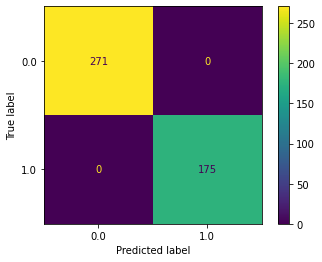

In [93]:
ConfusionMatrixDisplay.from_estimator(ada_equal, X_equal_train, y_equal_train)

In [94]:
y_equal_pred = ada_equal.predict(X_equal_test)
print("Accuracy: ", accuracy_score(y_equal_test, y_equal_pred))

Accuracy:  1.0


R2 score:  1.0
Accuracy:  1.0
MSE:  0.0
RMSE:  0.0


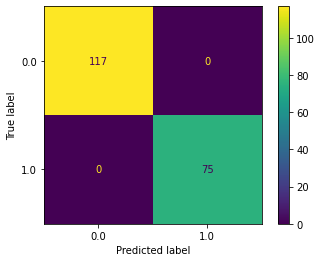

In [95]:
evaluate_on_test(ada_equal, X_equal_test, y_equal_test)

In [124]:
importance_equal = ada_equal.feature_importances_

equal_importances = sorted(zip(importance_equal, features), reverse=True)
equal_importances

[(0.12, 'A1'),
 (0.1, 'A8'),
 (0.1, 'A7'),
 (0.1, 'A6'),
 (0.1, 'A4'),
 (0.1, 'A2'),
 (0.1, 'A10'),
 (0.08, 'A5'),
 (0.08, 'A3'),
 (0.06, 'A9'),
 (0.02, 'Jaundice'),
 (0.02, 'Family_mem_with_ASD'),
 (0.02, 'Age_Mons'),
 (0.0, 'Sex'),
 (0.0, 'Ethnicity')]

**Female Only**

In [107]:
f_only.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,0.666667,1.0,1.0,1.0,0.0,0.0
4,1,1,0,1,1,1,1,1,1,1,0.333333,1.0,1.0,0.0,1.0,1.0
12,0,0,0,0,0,0,0,0,0,0,0.541667,1.0,1.0,1.0,0.0,0.0
13,1,1,1,1,0,0,1,0,1,1,0.125000,1.0,1.0,1.0,0.0,1.0
17,1,1,1,0,1,1,1,1,0,1,0.000000,1.0,1.0,1.0,0.0,1.0


In [ ]:
f_only['ASD_Traits'].value_counts()

In [ ]:
# f_only = f_only.drop(["Case_No","Qchat-10-Score","Who completed the test"], axis=1)

In [ ]:
preprocess(age, char_vals,f_only)

In [82]:
X_f = f_only.drop("ASD_Traits", axis=1)
y_f = f_only["ASD_Traits"]

X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f,y_f, test_size=0.3, random_state=42, stratify=y_f)

In [83]:
ada_f = AdaBoostClassifier()
ada_f_model = ada_f.fit(X_f_train, y_f_train)
# scores_f = cross_val_score(ada_f_model, X_f_train, y_f_train, scoring='accuracy',cv=cv, n_jobs=-1,error_score='raise')
# print('AdaBoostClassifier Female Dataset accuracy:  %.3f (%.3f)' % (mean(scores_f),std(scores_f)))

In [84]:
cross_validation_results(ada_f_model, X_f_train, y_f_train, metrics, cv=10)

Mean Test R2:  0.9446886446886447
Mean Test MSE:  0.01324110671936759
Test std:  0.09627675696730742
RMSE Test:  0.063022954446976
Accuracy:  0.9867588932806324


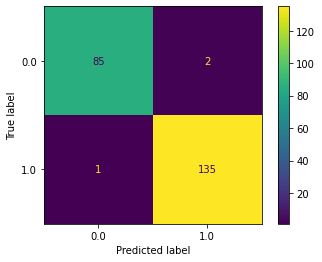

In [85]:
from sklearn.model_selection import cross_val_predict

y_f_pred = cross_val_predict(ada_f_model, X_f_train, y_f_train, cv=10)

ConfusionMatrixDisplay.from_predictions(y_f_train, y_f_pred)


In [86]:
for row_index, (input, prediction, label) in enumerate(zip(X_f_train.values, y_f_pred, y_f_train)):
    if prediction != label:
        print('Row', row_index, 'has been classified as', prediction, 'and should be', label)

Row 22 has been classified as 0.0 and should be 1.0
Row 24 has been classified as 1.0 and should be 0.0
Row 220 has been classified as 1.0 and should be 0.0


In [111]:
# https://datascience.stackexchange.com/questions/37899/sklearn-svm-how-to-get-a-list-of-the-wrong-predictions
for row_index, (input, prediction, label) in enumerate(zip(X_f_test.values, y_new_f_pred, y_f_test)):
    if prediction != label:
        print('Row', row_index, 'has been classified as', prediction, 'and should be', label, "\nInput:",input )

Row 32 has been classified as 1.0 and should be 0.0 
Input: [1.         0.         0.         1.         0.         1.
 0.         0.         0.         0.         0.70833333 1.
 1.         0.         0.        ]
Row 40 has been classified as 1.0 and should be 0.0 
Input: [0.         0.         0.         1.         0.         0.
 1.         0.         0.         1.         0.91666667 1.
 1.         0.         1.        ]


3 False positives, 5 False negatives - When not stratified training and test data splits
\
2 False positives - When stratified on target

R2 score:  0.9128856624319419
Accuracy:  0.9791666666666666
MSE:  0.020833333333333332
RMSE:  0.14433756729740643


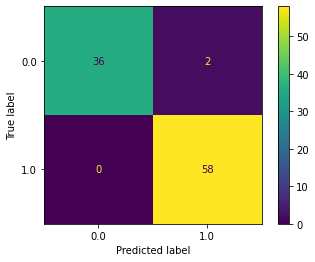

In [117]:
evaluate_on_test(ada_f_model, X_f_test,y_f_pred)

In [121]:
y_new_f_pred = ada_f_model.predict(X_f_test)

In [122]:
for row_index, (input, prediction, label) in enumerate(zip(X_f_test.values, y_new_f_pred, y_f_test)):
    if prediction != label:
        print('Row', row_index, 'has been classified as', prediction, 'and should be', label, "\nInput:",input)

Row 32 has been classified as 1.0 and should be 0.0 
Input: [1.         0.         0.         1.         0.         1.
 0.         0.         0.         0.         0.70833333 1.
 1.         0.         0.        ]
Row 40 has been classified as 1.0 and should be 0.0 
Input: [0.         0.         0.         1.         0.         0.
 1.         0.         0.         1.         0.91666667 1.
 1.         0.         1.        ]


In [113]:
importance_fem = ada_f_model.feature_importances_
female_importances = sorted(zip(importance_fem, features), reverse=True)
female_importances

[(0.12, 'A4'),
 (0.12, 'A1'),
 (0.1, 'A8'),
 (0.1, 'A6'),
 (0.1, 'A5'),
 (0.1, 'A10'),
 (0.08, 'Age_Mons'),
 (0.08, 'A9'),
 (0.06, 'A7'),
 (0.06, 'A2'),
 (0.04, 'A3'),
 (0.02, 'Jaundice'),
 (0.02, 'Family_mem_with_ASD'),
 (0.0, 'Sex'),
 (0.0, 'Ethnicity')]

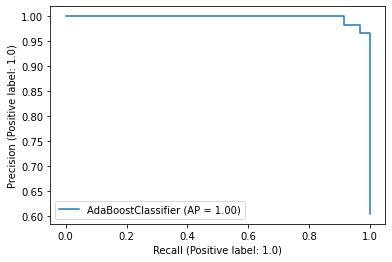

In [109]:
PrecisionRecallDisplay.from_estimator(ada_f_model, X_f_test, y_f_test)